[*********************100%***********************]  1 of 1 completed

Fold 1: MSE: 6.45, R²: 0.90
Fold 2: MSE: 4.75, R²: 0.98
Fold 3: MSE: 11.16, R²: 0.93
Fold 4: MSE: 8.95, R²: 0.92
Fold 5: MSE: 4.72, R²: 0.93


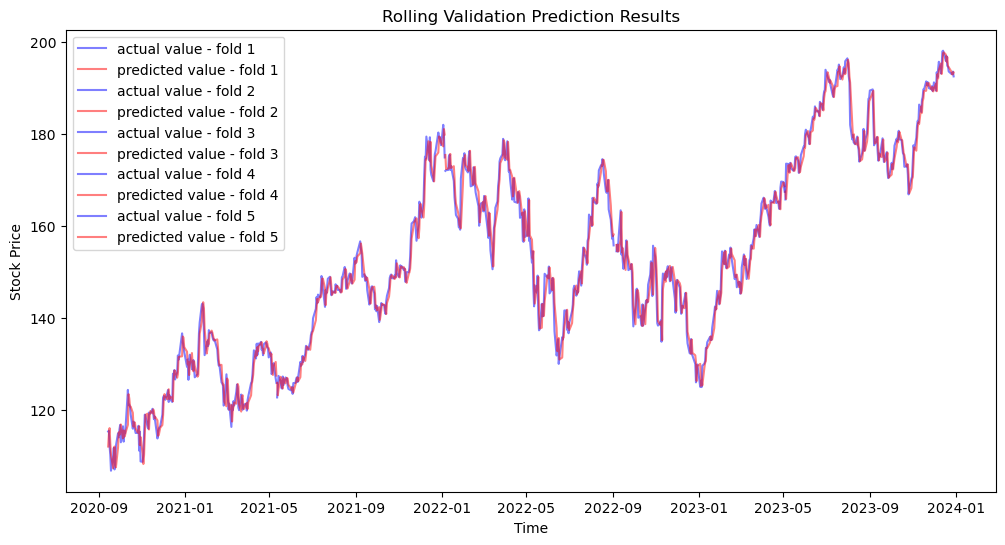


Average MSE: 7.20
Average R²: 0.93


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 数据加载
# 下载AAPL股票数据
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')[['Close']]
data = data.rename(columns={'Close': 'AAPL_Close'})

# 2. 创建滞后特征
n_days = 5
for i in range(1, n_days + 1):
    data[f'Lag_{i}'] = data['AAPL_Close'].shift(i)

# 删除缺失值
data = data.dropna()

# 特征和目标
X = data[[f'Lag_{i}' for i in range(1, n_days + 1)]]
y = data['AAPL_Close']

# 3. 初始化滚动验证
tscv = TimeSeriesSplit(n_splits=5)

# 存储结果
mse_scores = []
r2_scores = []

# 4. 滚动验证
plt.figure(figsize=(12, 6))  # 可视化设置
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    # 划分训练集和测试集
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 模型初始化与训练
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # 打印每次分割的评估结果
    print(f"Fold {i+1}: MSE: {mse:.2f}, R²: {r2:.2f}")
    
    # 可视化预测结果
    plt.plot(y_test.index, y_test, label=f'actual value - fold {i+1}', color='blue', alpha=0.5)
    plt.plot(y_test.index, y_pred, label=f'predicted value - fold {i+1}', color='red', alpha=0.5)

# 5. 可视化结果
plt.title('Rolling Validation Prediction Results')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. 汇总结果
print(f"\nAverage MSE: {np.mean(mse_scores):.2f}")
print(f"Average R²: {np.mean(r2_scores):.2f}")


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088303  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484337  75.797501  76.110001  74.290001  74.290001  132079200


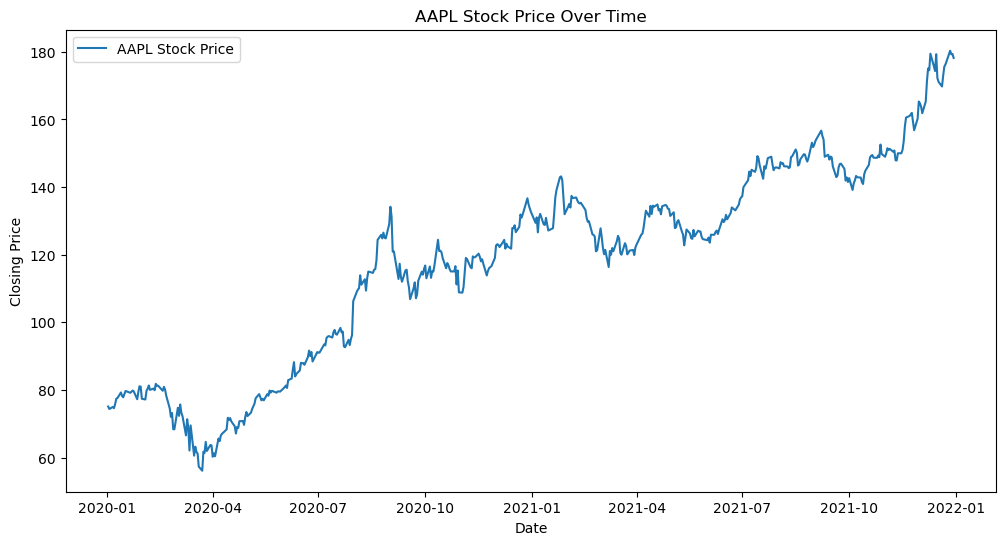

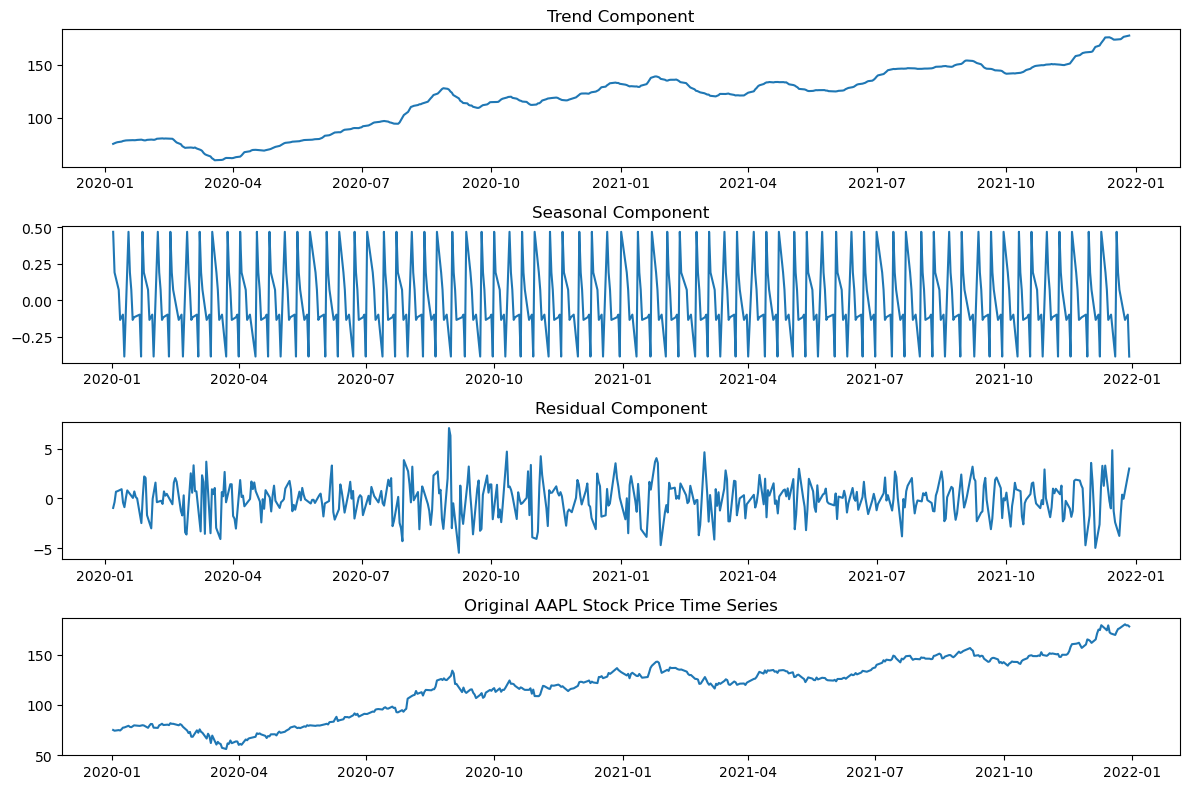

In [127]:
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
import yfinance as yf
import matplotlib.pyplot as plt
import pmdarima as pm
import pandas as pd
import os
os.chdir('/Users/kailiu/StockMarketPrediction-/')
import utils.APIs as APIs
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# Fetch historical stock price data (replace 'AAPL' with the desired stock symbol)
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

# Download historical data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the dataset
print(df.head())

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label=f'{stock_symbol} Stock Price')
plt.title(f'{stock_symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Perform time series decomposition (trend, seasonality, and residual)
result = seasonal_decompose(df['Close'], model='additive', period=7)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(df['Close'], label=f'{stock_symbol} Stock Price')
plt.title(f'Original {stock_symbol} Stock Price Time Series')

plt.tight_layout()
plt.show()



In [128]:
df_reconstructed = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis = 1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
Date,,,,
2020-01-02,0.467848,NaN,NaN,75.087502
2020-01-03,0.190388,NaN,NaN,74.357498
2020-01-06,0.071691,NaN,NaN,74.949997
2020-01-07,-0.133495,75.682857,-0.951859,74.597504
2020-01-08,-0.115367,76.276071,-0.363204,75.797501
...,...,...,...,...
2021-12-23,0.071691,176.237143,-0.028836,176.279999
2021-12-27,-0.133495,177.444286,3.019211,180.330002
2021-12-28,-0.115367,NaN,NaN,179.289993


In [129]:
# find missing values
missing_values = df_reconstructed.isnull().sum()
print(missing_values)


seas             0
trend            6
resid            6
actual_values    0
dtype: int64


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 数据加载
data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')[['Close']]
data = data.rename(columns={'Close': 'AAPL_Close'})

# 2. 时间序列趋势建模（ARIMA）
# 拆分训练集和测试集
train_ratio = 0.8
train_size = int(len(data) * train_ratio)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# ARIMA 模型拟合与预测
arima_order = (5, 1, 0)
arima_model = ARIMA(train['AAPL_Close'], order=arima_order).fit()

# 确保 Trend 为对齐后的单列数据
train['Trend'] = arima_model.fittedvalues.squeeze()
test['Trend'] = arima_model.forecast(steps=len(test))

# 计算残差
train['Residual'] = train['AAPL_Close'] - train['Trend']

# 确认对齐索引
print(train.index[-5:])  # 检查训练集末尾的索引
print(test.index[:5])    # 检查测试集开头的索引

# 3. 残差建模（机器学习）
# 构造滞后特征
n_lags = 5
for lag in range(1, n_lags + 1):
    train[f'Lag_{lag}'] = train['Residual'].shift(lag)

# 删除缺失值
train = train.dropna()

# 定义特征和目标
X = train[[f'Lag_{lag}' for lag in range(1, n_lags + 1)]]
y = train['Residual']

# 使用机器学习模型拟合残差
ml_model = GradientBoostingRegressor()
ml_model.fit(X, y)

# 准备测试集残差特征
for lag in range(1, n_lags + 1):
    test[f'Lag_{lag}'] = test['Trend'].shift(lag)

# 填充缺失值为 0（简化处理）
test = test.fillna(0)

# 预测残差部分
test['Residual_Pred'] = ml_model.predict(test[[f'Lag_{lag}' for lag in range(1, n_lags + 1)]])

# 4. 最终预测结果 = 趋势部分 + 残差部分
test['Final_Pred'] = test['Trend'] + test['Residual_Pred']

# 5. 评估结果
mse = mean_squared_error(test['AAPL_Close'], test['Final_Pred'])
print(f"MSE: {mse:.2f}")

# 6. 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['AAPL_Close'], label='training set - actual value', color='blue')
plt.plot(test.index, test['AAPL_Close'], label='testing set - actual value', color='green')
plt.plot(test.index, test['Final_Pred'], label='final predicted value', color='red', linestyle='dashed')
plt.title('ARIMA + Machine Learning Prediction Results')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


/opt/anaconda3/envs/LLM/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/LLM/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/LLM/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/n9/j0dtm7bn7_56lrscncyljw6m0000gn/T/ipykernel_81310/970134629.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

ValueError: Cannot set a DataFrame with multiple columns to the single column Residual